# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

2. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?


If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns


4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

In [68]:
data = pd.read_excel('../data/factor_pricing_data.xlsx', sheet_name='factors (excess returns)', index_col='Date')
data

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...
2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030,-0.0042
2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307,-0.0002
2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178,0.0090


In [69]:
def stats_mean_vol_sharpe(data,portfolio = None, portfolio_name='Portfolio',annualize = 12):
    if portfolio is None:
        returns = data
    else:
        returns = data @ portfolio
    
    output = returns.agg(['mean','std'])
    output.loc['sharpe'] = output.loc['mean'] / output.loc['std']
    
    output.loc['mean'] *= annualize
    output.loc['std'] *= np.sqrt(annualize)
    output.loc['sharpe'] *= np.sqrt(annualize)
    
    if portfolio is None:
        pass
    else:
        output.columns = [portfolio_name]
    
    return output

In [70]:
stats = stats_mean_vol_sharpe(data)
stats

,MKT,SMB,HML,RMW,CMA,UMD
mean,0.086277,0.008319,0.025809,0.047096,0.029537,0.062709
std,0.156904,0.101873,0.109999,0.083213,0.073084,0.154564
sharpe,0.549872,0.081665,0.234629,0.565962,0.404148,0.405714


2. Based on the factor statistics above, answer the following.
(a) Does each factor have a positive risk premium (positive expected excess return)? (b) How have the factors performed since the time of the case, (2015-present)?

In [71]:
data_2015_to_end = data.loc['2015':]
stats_2015_to_end = stats_mean_vol_sharpe(data_2015_to_end)
stats_2015_to_end

,MKT,SMB,HML,RMW,CMA,UMD
mean,0.116586,-0.019500,-0.017855,0.050886,-0.008410,0.021083
std,0.160285,0.104524,0.132709,0.073338,0.083989,0.140812
sharpe,0.727369,-0.186559,-0.134544,0.693862,-0.100137,0.149723


a) for the entirety of the sample, the factors all have positive risk premiums

b) From 2015 to the present, on average the factors the MKT and RMW factors have performed better, the UMD factor has performed weaker, and the SMB, HML, and CMA factors have performed weaker AND have negative returns

3. Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

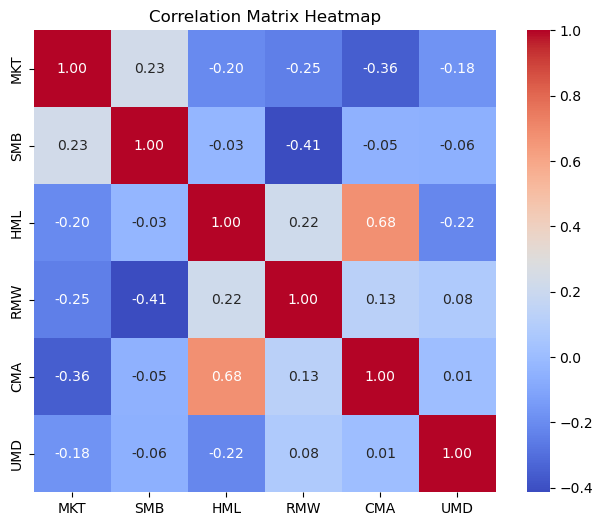

In [72]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [73]:
abs_corr_matrix = corr_matrix.abs()
np.fill_diagonal(abs_corr_matrix.values, np.nan)
mean_corr = abs_corr_matrix.mean()

mean_corr.sort_values()

UMD    0.107160
SMB    0.155152
RMW    0.217442
MKT    0.242458
CMA    0.244291
HML    0.269703
dtype: float64

a) Looking at the average correlations, the values seem very low, and no one factor is overcorrelated

b) While HML does have the higest overall correlation with other factors, and a large correlation with CMA (.68), it's not an outlier, and is comparable to the average correlations of CMA, MKT, and RMW.

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

***

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

In [74]:
portfolios = pd.read_excel('../data/factor_pricing_data.xlsx', sheet_name='portfolios (excess returns)', index_col='Date')
portfolios

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.0629,0.0018,-0.0234,-0.0244,0.0199,-0.0368,-0.0999,-0.0632,-0.0205,-0.0686,...,-0.0352,-0.0842,-0.0639,-0.0554,-0.0279,-0.0437,-0.0455,-0.1186,-0.0502,-0.0284
2024-05-31,0.0383,-0.0188,0.0159,-0.0224,0.0598,0.0017,0.0931,0.1255,-0.0024,0.0447,...,0.0350,-0.0008,-0.0029,0.0322,-0.0393,0.0251,0.0324,0.0427,0.0428,0.0348
2024-06-30,-0.0354,-0.0409,-0.0056,-0.0346,0.0062,-0.0406,0.0394,0.0075,-0.0053,-0.1286,...,-0.0877,0.0259,-0.0325,0.0468,0.0019,-0.0103,-0.0065,-0.0128,0.0005,-0.0170


In [75]:
import statsmodels.api as sm

# def LFPM_TS(assets, factors, annualize = 12, name = 'asset', treynor = False, mkt_name = 'Mkt-RF'):
def LFPM_TS(assets, factors, annualize = 12, name = 'asset'):
    
    if isinstance(assets,pd.Series):
        assets = pd.DataFrame(assets,columns=name)
    
    model_output = pd.DataFrame()
    stats_output = pd.DataFrame()
    
    x = sm.add_constant(factors)
    
    for asset in assets.columns:
        
        y = assets[asset]
        model = sm.OLS(y,x).fit()
        
        model_output[asset] = model.params
        
        # mu = y.mean() * annualize
        alpha = model.params.iloc[0] * annualize
        # sig_ep = model.resid.std() * np.sqrt(annualize)
        # IR = alpha / sig_ep
        r_squared  = model.rsquared
        
        stats_output[asset] = pd.Series(data = [alpha,r_squared],index = ['Alpha','R Squared'])
        
        # if treynor:
        #     mkt = model.params[mkt_name]
        #     TR = mu / mkt
            
        #     stats_output.loc['Treynor',asset] = TR
        
    return model_output, stats_output

In [76]:
def MAEcalc(data,name):
    return pd.DataFrame({
        'MAE': [data['const'].abs().mean()],
        'MAE (Annualized)': [data['Alpha'].abs().mean()]
    }, index=[name])


In [77]:
aqr_ts_reg_stats = pd.concat(LFPM_TS(portfolios,data[['MKT', 'HML', 'RMW', 'UMD']])).T
MAEcalc(aqr_ts_reg_stats, "AQR")

,MAE,MAE (Annualized)
AQR,0.001916,0.022993


In [78]:
aqr_ts_reg_stats.head()

,const,MKT,HML,RMW,UMD,Alpha,R Squared
Agric,0.000643,0.836774,0.184332,-0.011247,0.080408,0.007721,0.339175
Food,0.000579,0.679100,0.183550,0.489345,0.042428,0.006950,0.464221
Soda,0.001436,0.783908,0.204231,0.490429,-0.084807,0.017230,0.308354
Beer,0.001422,0.721367,0.038420,0.584607,0.087322,0.017060,0.420762
Smoke,0.002942,0.737693,0.258770,0.655168,-0.028303,0.035306,0.273489


In [79]:
aqr_ts_reg_stats['Alpha'].mean()

-0.005247902656649154

If the pricing model worked, our alphas would be low or very close to zero. This is because a functioning pricing model should be able to explain the returns with just its factors. In our case, the average alpha is ~0.5%, which implies the model is doing a decent job, but not excellent.

Our average MAE is 2.3% a year, which is good, and we can use this to assert the pricing model is functioning well.

2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?

In [80]:
MAEcalc(pd.concat(LFPM_TS(portfolios,data[['MKT']])).T,"CAPM")

,MAE,MAE (Annualized)
CAPM,0.0017,0.020402


In [81]:
MAEcalc(pd.concat(LFPM_TS(portfolios,data[['MKT','SMB','HML']])).T,"FF3")

,MAE,MAE (Annualized)
FF3,0.001999,0.023984


In [82]:
MAEcalc(pd.concat(LFPM_TS(portfolios,data[['MKT','SMB','HML','RMW','CMA']])).T,"FF5")

,MAE,MAE (Annualized)
FF5,0.002614,0.031367


In [83]:
MAEcalc(aqr_ts_reg_stats, "AQR")

,MAE,MAE (Annualized)
AQR,0.001916,0.022993


It seems as if the CAPM model fits the best, with the lowest MAE of 2.0%. However, AQR and FF3 are close, with MAEs of 2.2% and 2.4%. FF5 is the worst at 3.1%. All of them seem to perform fairly well.

 3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

Based on these results, FF3 is slightly more robust, and may be a more simple and more explainable model. Therefore, I would question the need to include the RMW and CMA factors if simplicity is focus. It may be worth to include a momentum factor, as we could further reduce MAE/average alpha per portfolio.

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

In [84]:
#todo


5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

In [85]:
#todo